In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from fastai.vision import *
from fastai import *

### Create datasets from Google images

In [46]:
folder = 'basketball'
file = 'basketball.txt'

In [42]:
folder = 'football'
file = 'football.txt'

In [38]:
folder = 'rugby'
file = 'rugby.txt'

In [33]:
folder = 'soccer'
file = 'soccer.txt'

In [10]:
folder = 'volleyball'
file = 'volleyball.txt'

In [11]:
path = Path('data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
path.ls()

[PosixPath('data/sports/football'),
 PosixPath('data/sports/soccer.txt'),
 PosixPath('data/sports/basketball.txt'),
 PosixPath('data/sports/volleyball.txt'),
 PosixPath('data/sports/rugby'),
 PosixPath('data/sports/.ipynb_checkpoints'),
 PosixPath('data/sports/basketball'),
 PosixPath('data/sports/soccer'),
 PosixPath('data/sports/volleyball'),
 PosixPath('data/sports/models'),
 PosixPath('data/sports/rugby.txt'),
 PosixPath('data/sports/football.txt')]

In [13]:
path/file

PosixPath('data/sports/volleyball.txt')

In [50]:
download_images(path/file, dest, max_pics=200)

Error https://www.adidas.com.my/dw/image/v2/bcbs_prd/on/demandware.static/-/Sites-adidas-products/default/dw29a2ca11/zoom/X35859_02_standard.jpg HTTPSConnectionPool(host='www.adidas.com.my', port=443): Read timed out. (read timeout=4)


### Verify datasets to remove images that can't be opened

In [14]:
classes = ['basketball', 'football', 'rugby', 'soccer', 'volleyball']

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

basketball


football


rugby


soccer


volleyball


### View dataset

In [20]:
np.random.seed(42)
path_img = Path('/floyd/home/data/sports')
fnames = sorted(Path('/floyd/home/data/sports').glob('**/*.jpg'))
pat = r'([^/]+)_\d+.jpg'

In [21]:
data = (ImageDataBunch
        .from_name_re(path,
                      fnames,
                      pat,
                      ds_tfms=get_transforms(),
                      size=224,
                      bs=64)
		.normalize(imagenet_stats))

AttributeError: 'NoneType' object has no attribute 'group'

In [14]:
data.classes

['basketball', 'football', 'rugby', 'soccer', 'volleyball']

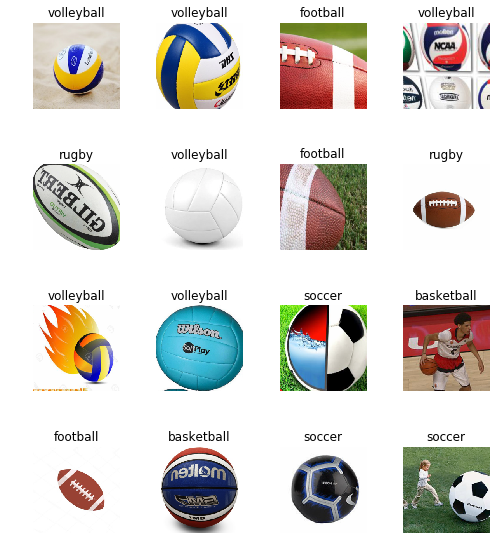

In [15]:
data.show_batch(rows=4, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['basketball', 'football', 'rugby', 'soccer', 'volleyball'], 5, 715, 178)

### Train model

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 25488996.12it/s]


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.653364,0.736856,0.241573,00:12
1,1.075466,0.500209,0.157303,00:10
2,0.796123,0.483646,0.174157,00:10
3,0.623117,0.476331,0.168539,00:10


In [19]:
learn.save('stage-1')

In [22]:
learn.export()

#### Interpretation

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

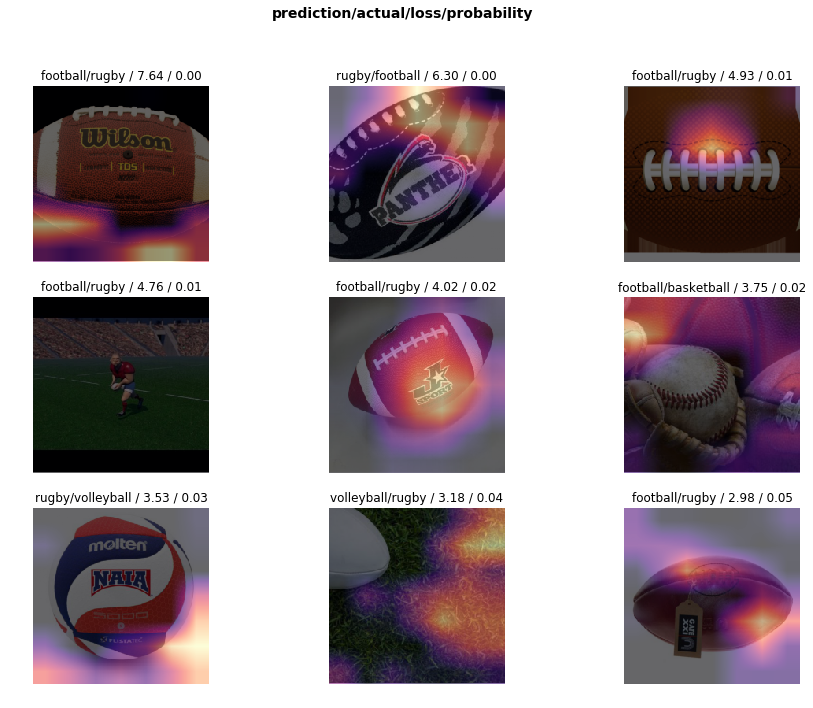

In [35]:
interp.plot_top_losses(9, figsize=(15, 11))

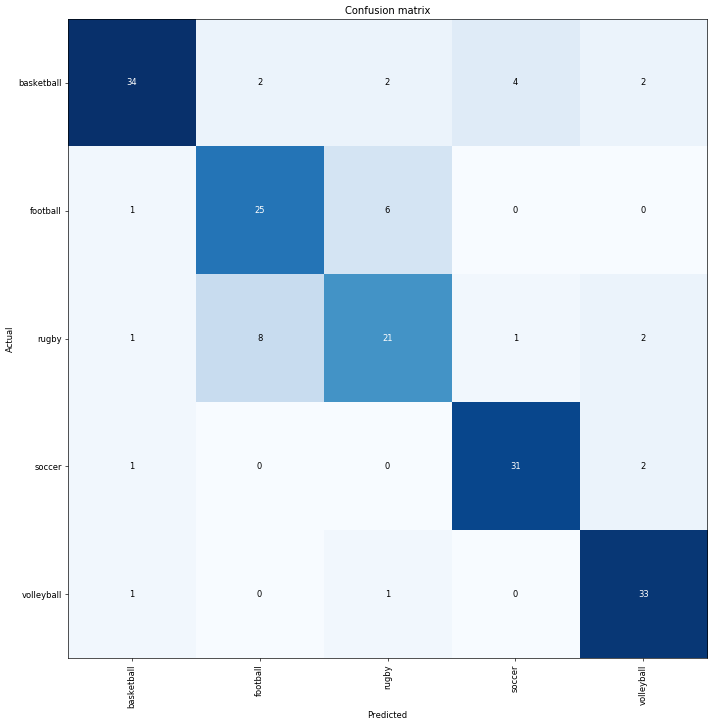

In [36]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [37]:
interp.most_confused(min_val=2)

[('rugby', 'football', 8),
 ('football', 'rugby', 6),
 ('basketball', 'soccer', 4),
 ('basketball', 'football', 2),
 ('basketball', 'rugby', 2),
 ('basketball', 'volleyball', 2),
 ('rugby', 'volleyball', 2),
 ('soccer', 'volleyball', 2)]

#### Unfreeze layers and train more!

In [38]:
learn.unfreeze()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


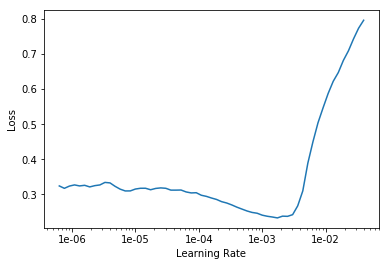

In [40]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.177303,1.998767,0.376404,00:11
1,0.169282,4.301536,0.561798,00:11
2,0.143335,2.555040,0.410112,00:11
3,0.119088,1.199645,0.191011,00:11
4,0.105618,0.985078,0.146067,00:11
5,0.088325,0.945176,0.162921,00:11
6,0.074972,0.953132,0.162921,00:11
7,0.063307,0.938068,0.162921,00:11
8,0.054774,0.943011,0.157303,00:11
9,0.048939,0.943441,0.146067,00:11


In [47]:
learn.save('stage-2')

#### More interpretation

In [48]:
interp2 = ClassificationInterpretation.from_learner(learn)

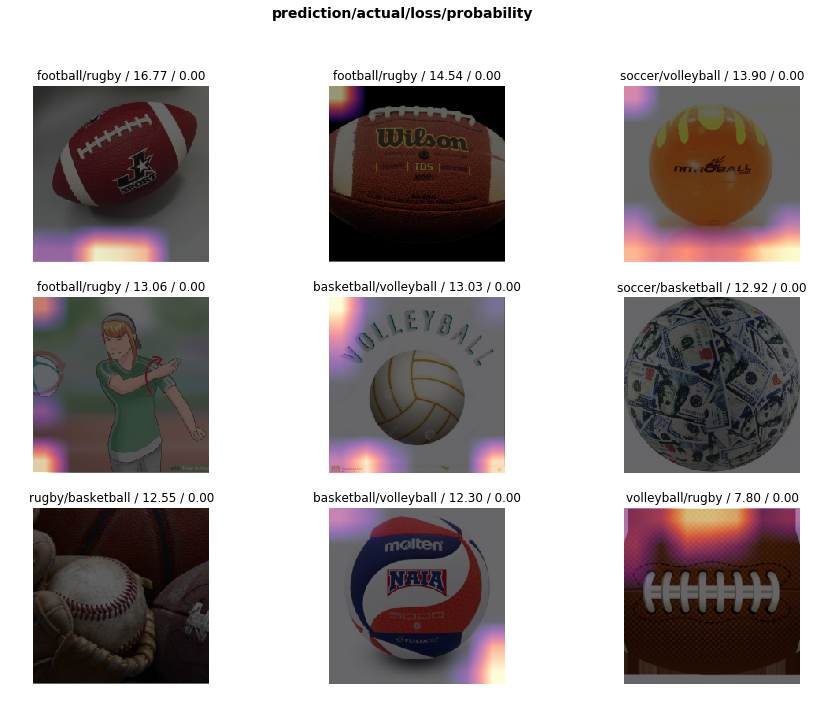

In [49]:
interp2.plot_top_losses(9, figsize=(15,11))

[('rugby', 'football', 9),
 ('football', 'rugby', 4),
 ('basketball', 'soccer', 3),
 ('basketball', 'volleyball', 2),
 ('rugby', 'volleyball', 2),
 ('volleyball', 'basketball', 2),
 ('volleyball', 'soccer', 2)]

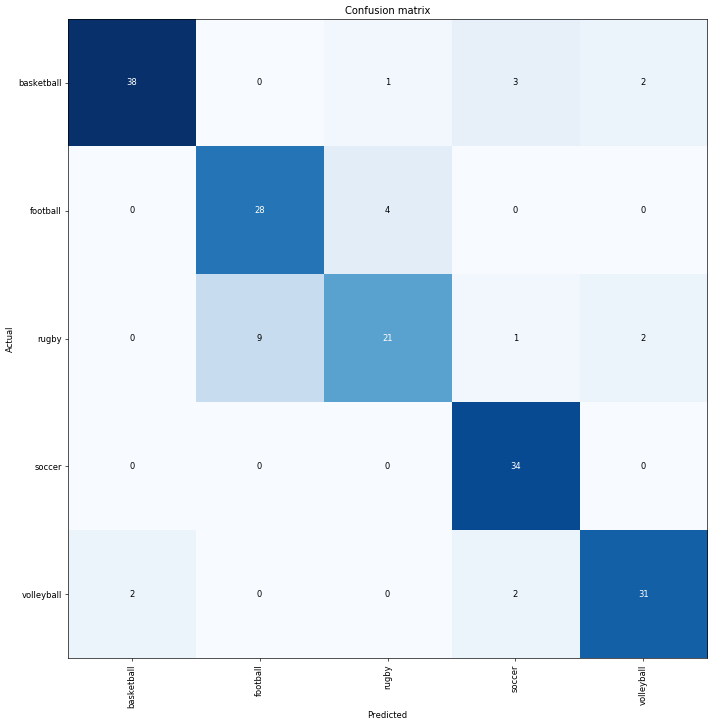

In [50]:
interp2.plot_confusion_matrix(figsize=(12, 12), dpi=60)
interp2.most_confused(min_val=2)